In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus']=False

import matplotlib.style as psl
print(plt.style.available)
# 查看样式列表
psl.use('ggplot')

% matplotlib inline

['seaborn-dark', 'Solarize_Light2', 'seaborn-darkgrid', 'seaborn-paper', 'seaborn-poster', 'bmh', 'ggplot', 'seaborn-talk', 'seaborn-whitegrid', 'classic', 'grayscale', 'seaborn-dark-palette', 'fast', 'seaborn-deep', 'seaborn-white', 'seaborn-muted', 'seaborn-ticks', 'dark_background', 'seaborn-notebook', 'seaborn-colorblind', '_classic_test', 'fivethirtyeight', 'seaborn-bright', 'seaborn', 'seaborn-pastel']


In [2]:
#读取数据xls的数据,其实为csv的文件
def loadCsv(file,date_time):
    dataf = pd.read_csv(file, encoding='GB18030', delimiter='\t', header=1).drop('Unnamed: 8', axis=1)
    dataf['savetime'] = pd.to_datetime(date_time).strftime('%Y-%m-%d')
    return dataf

#读取数据xls的数据，真实xls
def loadExl(file,date_time):
    dataf = pd.read_excel(file, encoding='utf8', header=1)
    dataf['savetime'] = pd.to_datetime(date_time).strftime('%Y-%m-%d')
    return dataf

#列名重新定义
def reName(df, n):
    df.columns = n
    return df

#文件合成工厂(软件导出数据)
def loadExcFac(path,date_time,columnsName,nums):
    name1 = 'Table'
    name2 = '.xls'
    shuju = pd.DataFrame(columns=columnsName)
    for i in nums:
        name = path + name1 + str(i) + name2
        dateTime = date_time + '-' + str(i)
        df = loadCsv(name, dateTime)
        df = reName(df, columnsName)
        df['涨幅%'] = df['涨幅%'].str.strip("%").astype(float)/100
        shuju = shuju.append(df, ignore_index=True)
    return shuju

#文件合成工厂(手动调整的xls)
def loadExc2Fac(path,date_time,columnsName,nums):
    name1 = 'Table'
    name2 = '.xls'
    shuju = pd.DataFrame(columns=columnsName)
    for i in nums:
        name = path + name1 + str(i) + name2
        dateTime = date_time + '-' + str(i)
        df = loadExl(name, dateTime)
        df = reName(df, columnsName)
        df['涨幅%'] = df['涨幅%']
        shuju = shuju.append(df, ignore_index=True)
    return shuju

#合并数据
def combineDf(df1,*dfs): 
    for dfi in dfs:
        df1 = df1.append(dfi, ignore_index=True)
    return df1

#输出数据
str_data = '/home/sunmd/stock/shuju.xlsx'
#str_data = r'C:\Users\sun-m\Desktop\stock\shuju.xlsx'

#输入路径
file_path = r'/home/sunmd/stock/'
#file_path = 'C:/Users/sun-m/Desktop/stock/'

#固定的列名
columns_name = ['代码', '名称', '涨幅%', '净流入', '大流入', '大流出', '中流入', '中流出', '统计时间']
#读数据表
def read_data():
    return pd.read_excel(str_data)

#写数据表
def save_data(df):
    df.to_excel(str_data)
    
#导入一天的数据
def save_one_day(file_date, columns_name, num):
    df = read_data()
    df_one = loadExcFac(file_path, file_date, columns_name, [num])
    df = combineDf(df, df_one)
    df[columns_name[3:-1]] = df[columns_name[3:-1]].astype(np.int64)
    df.drop_duplicates(inplace=True)
    save_data(df)
    return df

#输出样式
df = read_data()
def rl_style(s):
    lst = []
    if s['涨幅%'] < 0:
        color = 'green'
    elif s['涨幅%'] > 0:
        color = 'red'
    else:
        color = 'white'
    lst.append('color:%s' % color)
    
    if s['净流入'] < 0:
        color = 'green'
    elif s['净流入'] > 0:
        color = 'red'
    else:
        color = 'white'
    lst.append('color:%s' % color)
    
    lst.append('color:red')
    lst.append('color:green')
    lst.append('color:red')
    lst.append('color:green')
    return lst

#数据样式
#print(df['涨幅%'].astype(np.float))
mystl = df.style.apply(rl_style,axis=1, subset=['涨幅%', '净流入',
                                        '大流入', '大流出',
                                        '中流入', '中流出']).format({'涨幅%':"{:+.2%}"}).\
bar(subset=['涨幅%','净流入'], align='mid', color=['#5fba7d', '#d65f5f'], width=100)

#数值标准化
def col_normalizy(df, *cols):
    temp_str = '_nor'
    for col in cols:
        df[col + temp_str] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

#涨幅和净流入图标回执
def zf_jlr(df, name, png_name):
    fig,axis = plt.subplots(1,2, figsize=(16,8))
    df['涨幅%'].plot(kind='bar', ax=axis[0], alpha=0.8, title=name + '涨幅统计', rot=45, fontsize=(15))
    df['净流入'].plot(kind='bar', ax=axis[1], alpha=0.8, title=name + '净流入统计', rot=45, fontsize=(15))
    print(file_path+png_name + "保存路径")
    plt.savefig(file_path+png_name, dpi=400)
    print('保存成功')

#饼图回执
def draw_pie(df, name, png_name):
    fig,axis = plt.subplots(1,1, figsize=(8,8))
    plt.title(name)
    plt.fontsize = 15
    plt.pie(df,
           labels = s.index,
           autopct='%.2f%%',
           pctdistance=0.6,
           labeldistance = 1.2,
           startangle=0,
           radius=1.5,
           frame=False)
    print(file_path+png_name + "保存路径")
    fig.subplots_adjust(right=0.7, top=0.7 )  
    plt.savefig(file_path+png_name,dpi=400)
    print('保存成功')

#异常值
#查询异常值
def detectoutliers2(list):
 
    outlier_indices = []  
    # iterate over features(columns)  
  
        # 1st quartile (25%)  
    Q1 = list.quantile(q=0.25)
    # 3rd quartile (75%)  
    Q3 = list.quantile(0.75)  
    # Interquartile range (IQR)  
    IQR = Q3 - Q1  
    # outlier step  
    outlier_step = 1.5 * IQR  
    # Determine a list of indices of outliers for feature col  
    outlier_list_col = list[(list < Q1 - outlier_step) | (list > Q3 + outlier_step )]  
  
    return outlier_list_col 

#异常值进行统计
def ycz():
    df_grp_name = df.groupby('名称').sum()
    name_list = df_grp_name.index
    #建立空的df
    outliers_list_zf = pd.DataFrame(columns=columns_name)
    #涨幅异常值
    for name in name_list:
        lst = detectoutliers2(df[df['名称'] == name]['涨幅%'].sort_values())
        outliers_list_zf = outliers_list_zf.append(df[df['名称'] == name][df[df['名称'] == name]['涨幅%']\
                                                                       .isin(lst)], ignore_index=False)
    outliers_list_zf.drop_duplicates(inplace=True)
    
    #净流入异常值
    
    #建立空的df
    outliers_list_jlr = pd.DataFrame(columns=columns_name)
    
    #净流入异常值
    for name in name_list:
        lst = detectoutliers2(df[df['名称'] == name]['净流入'].sort_values())
        outliers_list_jlr = outliers_list_jlr.append(df[df['名称'] == name][df[df['名称'] == name]['净流入']\
                                                                    .isin(lst)], ignore_index=False)
    outliers_list_jlr.drop_duplicates(inplace=True)
    
    return [outliers_list_zf, outliers_list_jlr]

In [3]:
file_date = '2018-06'

to_day = '2018-06-07'

df = save_one_day( file_date, columns_name, 7)

df[df['统计时间']=='2018-06-07'].head()

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
1185,881112,钢铁,0.0202,1226173990,2074002240,1165750190,1304411910,986489970,2018-06-07
1186,881153,房地产开发,0.0005,1136368790,2546227150,1665132160,2181151900,1925878100,2018-06-07
1187,881157,证券,0.0042,704082390,2378957100,1870479810,1858040000,1662434900,2018-06-07
1188,881156,保险及其他,0.0091,578974870,2504624070,1883710400,1455251800,1497190600,2018-06-07
1189,881111,化工新材料,-0.0014,523763960,1762788360,1289500840,817353740,766877300,2018-06-07


In [4]:
df[df['统计时间']==to_day].sort_values('净流入',ascending=False)\
.style.use(mystl.export()).format({'涨幅%':"{:+.2%}"})

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
1185,881112,钢铁,+2.02%,1226173990,2074002240,1165750190,1304411910,986489970,2018-06-07
1186,881153,房地产开发,+0.05%,1136368790,2546227150,1665132160,2181151900,1925878100,2018-06-07
1187,881157,证券,+0.42%,704082390,2378957100,1870479810,1858040000,1662434900,2018-06-07
1188,881156,保险及其他,+0.91%,578974870,2504624070,1883710400,1455251800,1497190600,2018-06-07
1189,881111,化工新材料,-0.14%,523763960,1762788360,1289500840,817353740,766877300,2018-06-07
1190,881155,银行,+0.31%,421504900,2902006860,2196923160,1597588700,1881167500,2018-06-07
1191,881158,零售,-1.16%,360283740,2701510500,1983324680,1128910820,1486812900,2018-06-07
1192,881102,养殖业,+0.29%,313922120,1204329840,1023771620,958099940,824736040,2018-06-07
1193,881105,煤炭开采加工,+0.35%,271859990,795182120,581715570,737659360,679265920,2018-06-07
1194,881128,交运设备服务,+0.44%,74176592,474759762,382451410,219602770,237734530,2018-06-07


In [5]:
#按分类进行统计

df_grp_name = df.groupby('名称').sum()
df_grp_name.sort_values(['涨幅%','净流入'], ascending=False)\
.style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,涨幅%,净流入,大流入,大流出,中流入,中流出
名称,,,,,,
食品加工制造,+12.78%,-1088147380,32836198920,32038066950,31316073010,33202352330
饮料制造,+11.43%,1009166240,50575674480,48986446040,42809429200,43389491370
酒店及餐饮,+10.04%,-120630840,1677858275,1511666370,2836998801,3123821546
交运设备服务,+9.60%,-788183687,3105890169,3537757387,2959535814,3315852283
农产品加工,+6.47%,-959831079,7696279104,7998648474,11406251330,12063713040
机场航运,+4.42%,-685239212,9052206157,8841430099,8545934110,9441949380
农业服务,+3.73%,-399828787,1133397327,1327995095,1884665576,2089896595
景点及旅游,+3.68%,40374408,5987827394,5941230470,7045780110,7052002630
家用轻工,+3.44%,-2303701273,8147133374,9564730819,12770852450,13656956280


/home/sunmd/stock/1.png保存路径
保存成功
/home/sunmd/stock/2.png保存路径
保存成功
/home/sunmd/stock/3.png保存路径
保存成功
/home/sunmd/stock/4.png保存路径
保存成功
/home/sunmd/stock/5.png保存路径
保存成功
/home/sunmd/stock/ycz_jlr0.png保存路径
保存成功
/home/sunmd/stock/ycz_jlr1.png保存路径
保存成功
/home/sunmd/stock/ycz_jlr2.png保存路径
保存成功


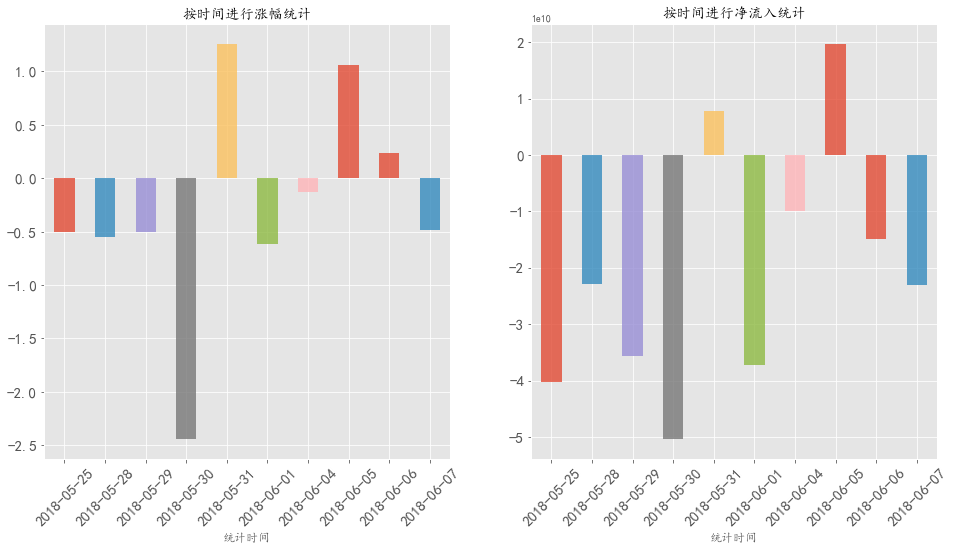

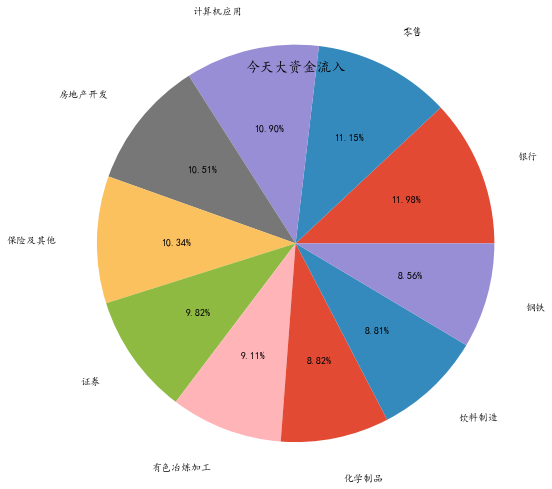

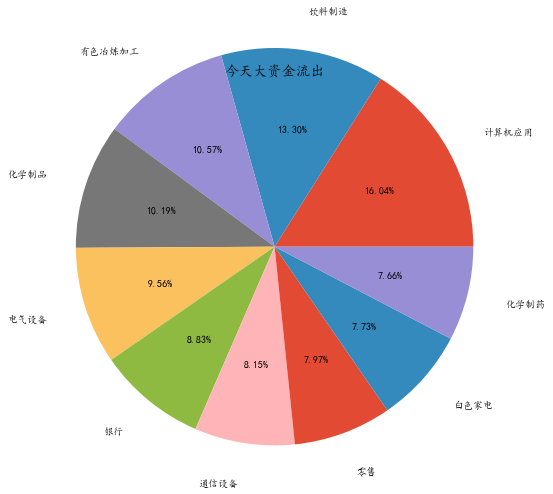

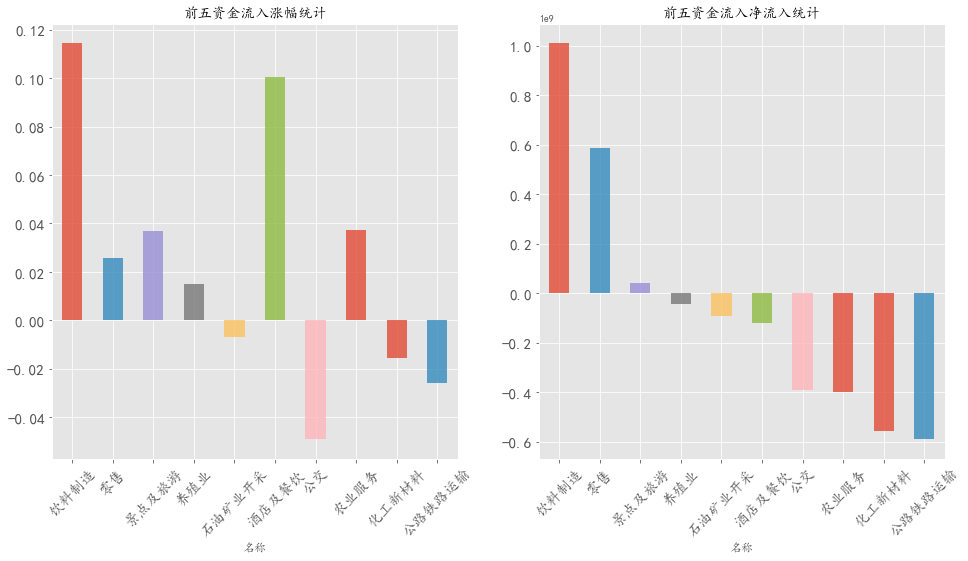

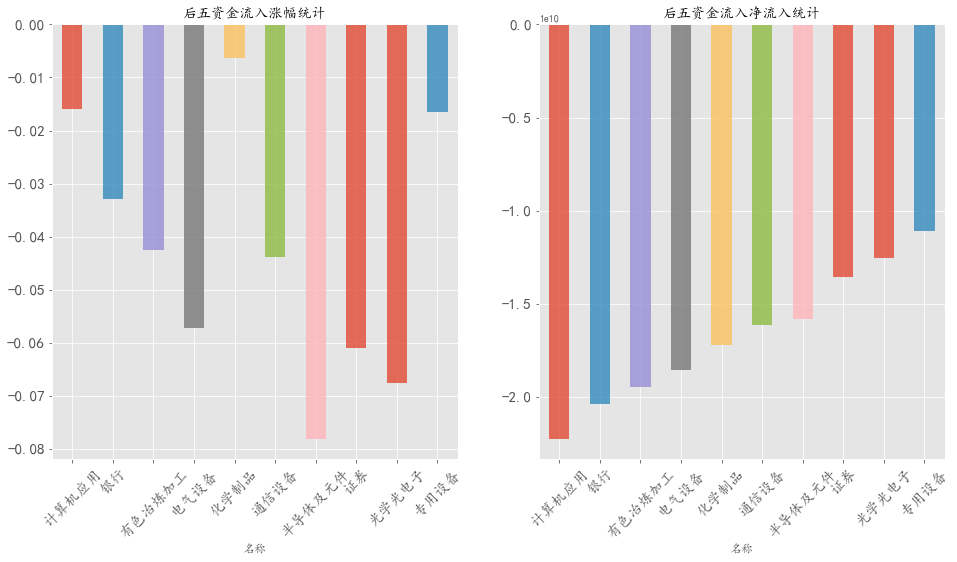

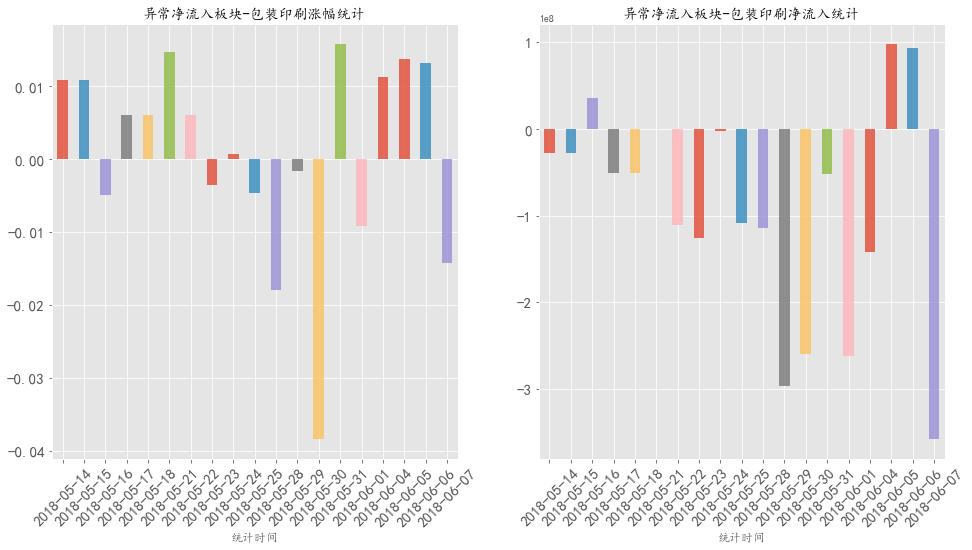

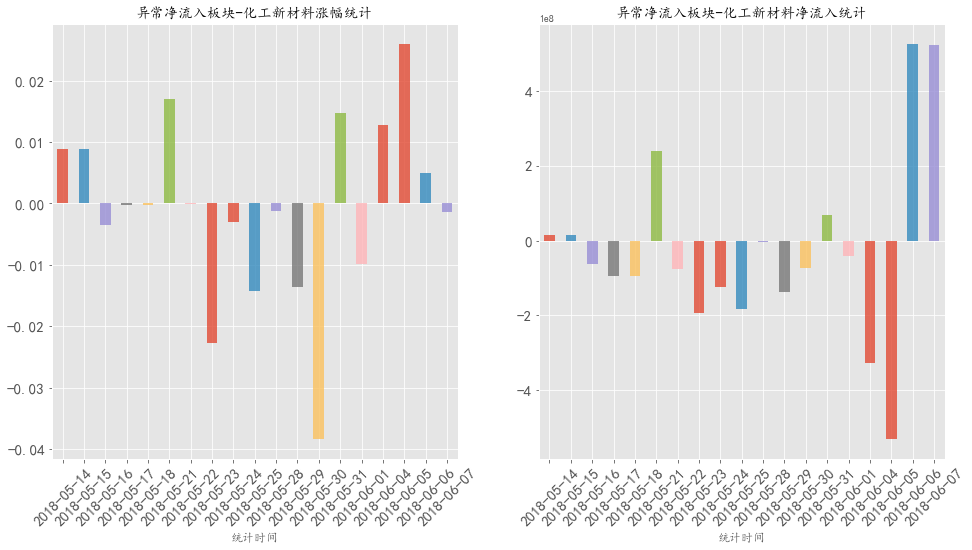

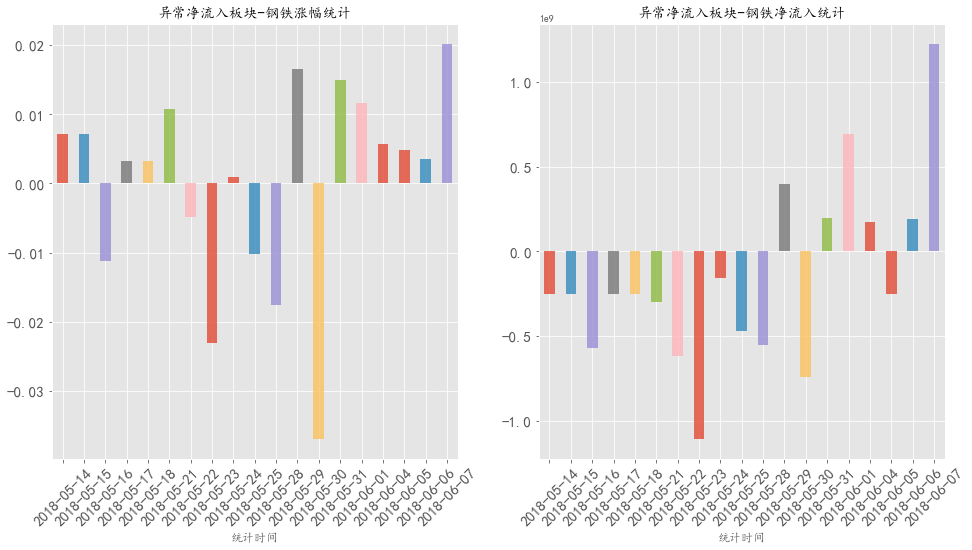

In [7]:
#按时间进行统计
df_grp_time = df.groupby('统计时间').sum()
df_grp_time.style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

zf_jlr(df_grp_time[-10:], "按时间进行", "1.png")

#大资金流入饼图
s = df[df['统计时间']==to_day]['大流入']
s.index = df[df['统计时间']==to_day]['名称']

s = s.sort_values(ascending=False)[:10]
draw_pie(s, '今天大资金流入', '2.png')

#大资金流出饼图
s = df[df['统计时间']==to_day]['大流出']
s.index = df[df['统计时间']==to_day]['名称']

s = s.sort_values(ascending=False)[:10]
draw_pie(s, '今天大资金流出', '3.png')

#按分类进行统计
df_grp_name = df.groupby('名称').sum()
df_grp_name.sort_values(['涨幅%','净流入'], ascending=False)\
.style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

#前五净流入
df_grp_name_f = df_grp_name.sort_values(['净流入','涨幅%'], ascending=False)
zf_jlr(df_grp_name_f.iloc[:10], '前五资金流入', '4.png')

#后5净流入
df_grp_name_b = df_grp_name.sort_values(['净流入','涨幅%'])
zf_jlr(df_grp_name_b.iloc[:10], '后五资金流入', '5.png')

#异常值
lst = ycz()

outliers_list_zf = lst[0]
outliers_list_jlr = lst[1]

if not outliers_list_zf[outliers_list_zf['统计时间'] == to_day].empty:
    temp_zf = outliers_list_zf[outliers_list_zf['统计时间'] == to_day]
    num = 0
    for name in temp_zf['名称']:
        df_yczf = df[df['名称']==name]
        df_yczf.index = df_yczf['统计时间']
        zf_jlr(df_yczf, '异常涨幅板块-' + name, 'ycz_zf' + str(num) +  '.png')
        num = num + 1
        
if not outliers_list_jlr[outliers_list_jlr['统计时间'] == to_day].empty:

    temp_jlr = outliers_list_jlr[outliers_list_jlr['统计时间'] == to_day]
    num = 0
    for name in temp_jlr['名称']:
        df_ycjlr = df[df['名称']==name]
        df_ycjlr.index = df_ycjlr['统计时间']
        zf_jlr(df_ycjlr, '异常净流入板块-' + name, 'ycz_jlr' + str(num) +  '.png')
        num = num + 1
        

In [8]:
#单个板块进行查看
df[df['名称'] == '保险及其他'].style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
59,881156,保险及其他,+0.21%,-466725960,1410152470,1688573230,857942800,1046248000,2018-05-14
125,881156,保险及其他,+0.21%,-466725960,1410152470,1688573230,857942800,1046248000,2018-05-15
185,881156,保险及其他,-1.06%,-1649123130,1208400990,2545370360,950035570,1262189330,2018-05-16
217,881156,保险及其他,+0.90%,623323550,2060641080,1413592670,1064984410,1088709270,2018-05-17
282,881156,保险及其他,+0.90%,623323550,2060641080,1413592670,1064984410,1088709270,2018-05-18
369,881156,保险及其他,+1.12%,-29612980,2174283820,2210961550,1205841330,1198776580,2018-05-21
451,881156,保险及其他,-0.24%,-1296955130,1071667100,2167734260,1004141060,1205029030,2018-05-22
514,881156,保险及其他,-1.82%,-1686969900,1083319660,2384771970,927035490,1312553060,2018-05-23
580,881156,保险及其他,-0.72%,-837770690,956263720,1682266600,788304850,900072660,2018-05-24
627,881156,保险及其他,-0.89%,-388847540,961734400,1165725790,845898140,1030754290,2018-05-25


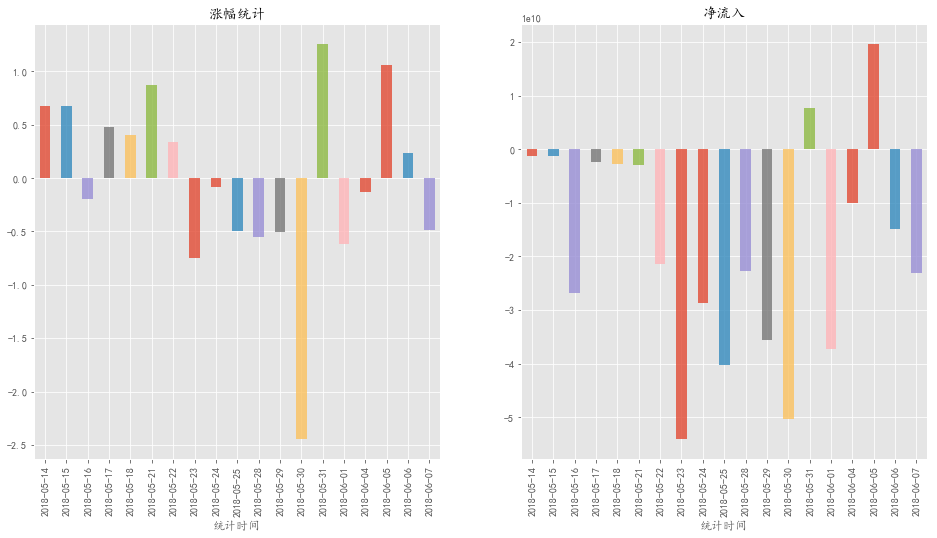

In [9]:
#整体版本的调查
fig_time,axis_time = plt.subplots(1,2, figsize=(16,8))

df_grp_time['涨幅%'].plot(kind='bar', ax=axis_time[0], alpha=0.8, title='涨幅统计')

df_grp_time['净流入'].plot(kind='bar', ax=axis_time[1], alpha=0.8, title='净流入')
plt.savefig(r'C:\Users\sun-m\Desktop\stock\DataAnlysisDemo-master\pic.png',
            dpi=400,
            bbox_inches = 'tight')

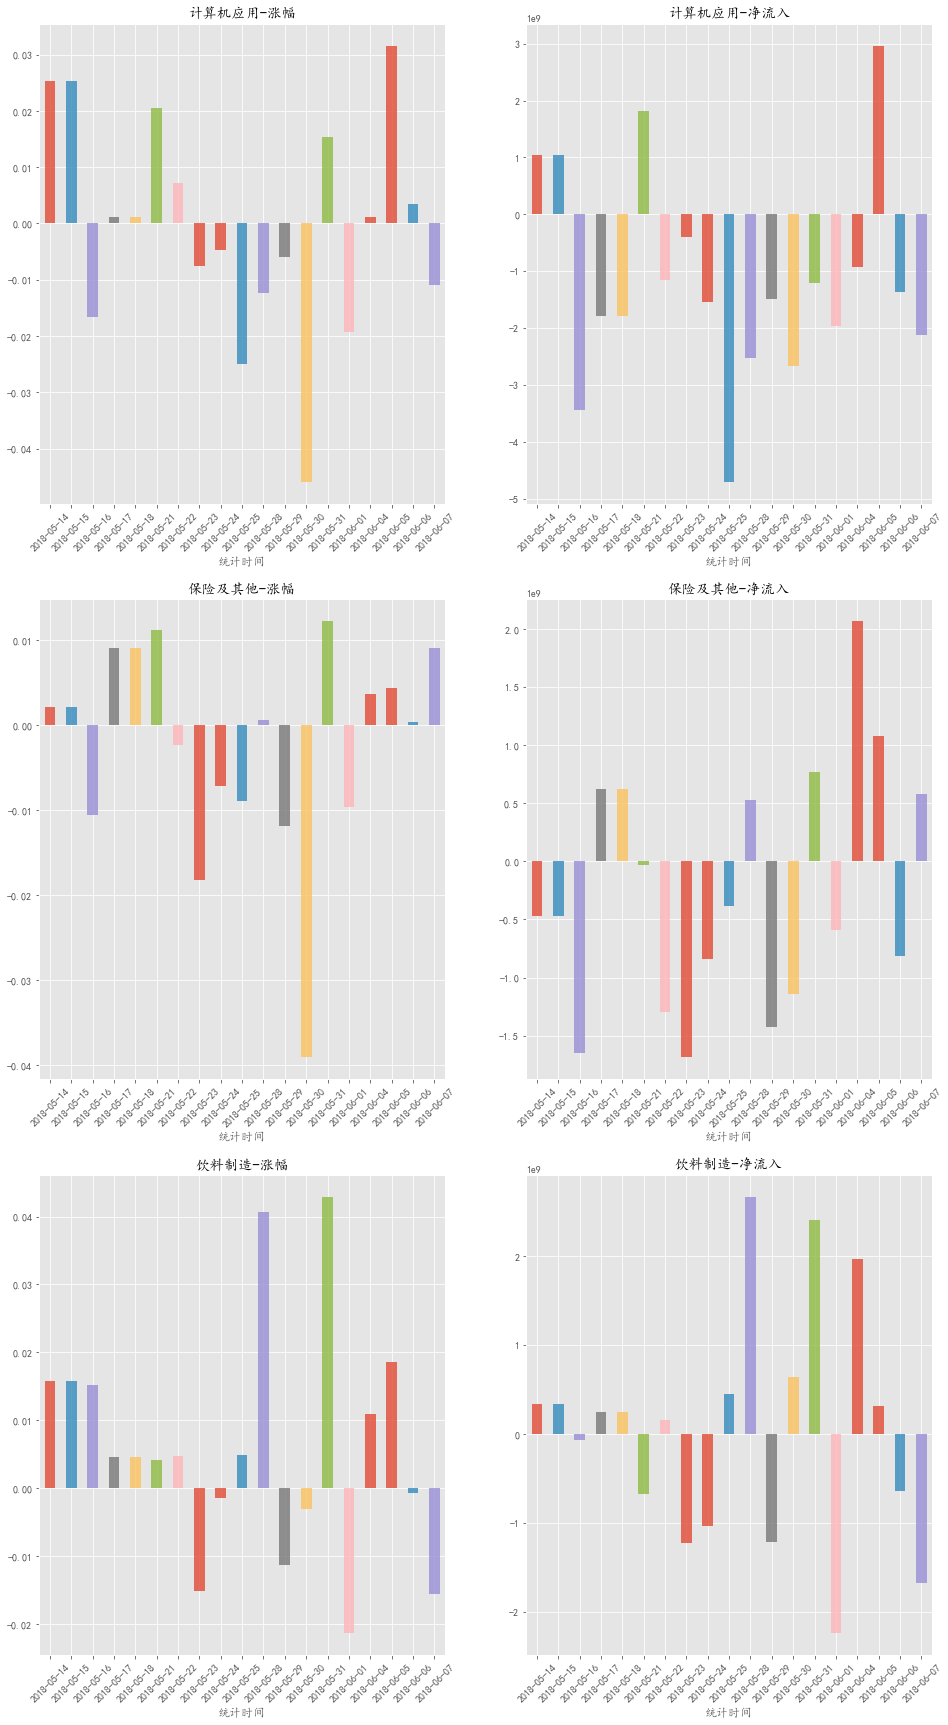

In [10]:
df_gx = df.copy()
df_gx.index = df_gx['统计时间']

#列出每个模块的涨幅和净流入
#name_list = df_grp_name.index
name_list = ['计算机应用', '保险及其他', '饮料制造']
fig_gg, axis_gg = plt.subplots(len(name_list), 2, figsize=(16,10*len(name_list)))
num = 0
for name in name_list:
    temp_df = df_gx[df_gx['名称'] == name]
    temp_df['涨幅%'].plot(kind='bar', alpha=0.8, ax=axis_gg[num][0], rot=45, title=name+'-涨幅')
    temp_df['净流入'].plot(kind='bar', alpha=0.8, ax=axis_gg[num][1], rot=45, title=name+'-净流入')
    num = num + 1
    plt.savefig(r'C:\Users\sun-m\Desktop\stock\DataAnlysisDemo-master\pic'+str(num)+'.png',
            dpi=400,
            bbox_inches = 'tight')
#for name in name_list:
#    print(df_gx[df_gx['名称'] == name]['涨幅%'].head())


In [29]:



outliers_list_zf.drop_duplicates().style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})


,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
847,881118,专用设备,-4.78%,-1576033770,839959430,1634775000,1389149900,2170368100,2018-05-30 00:00:00
852,881119,仪器仪表,-5.66%,-218720130,143552967,261312007,246231470,347192560,2018-05-30 00:00:00
826,881164,传媒,-4.32%,-1322884050,1058817430,1681975780,1559571900,2259297600,2018-05-30 00:00:00
821,881156,保险及其他,-3.91%,-1141262960,992803640,1805969290,990300960,1318398270,2018-05-30 00:00:00
843,881122,光学光电子,-4.63%,-1945691040,1254625640,2522996680,1435256600,2112576600,2018-05-30 00:00:00
834,881150,公交,-4.46%,-55735693,39112049,54276472,102826890,143398160,2018-05-30 00:00:00
811,881149,公路铁路运输,-3.49%,-283323640,100394092,250440622,225333570,358610680,2018-05-30 00:00:00
820,881138,包装印刷,-3.84%,-259230119,237654911,367889960,365200790,494195860,2018-05-30 00:00:00
845,881109,化学制品,-4.66%,-3047706110,1946986290,3895880900,2929007400,4027818900,2018-05-30 00:00:00
827,881140,化学制药,-4.33%,-1838619470,2101713130,3293521200,2557672900,3204484300,2018-05-30 00:00:00


In [28]:

outliers_list_jlr.sort_values('统计时间').drop_duplicates().style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})


,代码,名称,涨幅%,净流入,大流入,大流出,中流入,中流出,统计时间
57,881150,公交,+0.26%,100375506,115371494,25457668,63938527,53476847,2018-05-14 00:00:00
123,881150,公交,+0.26%,100375506,115371494,25457668,63938527,53476847,2018-05-15 00:00:00
133,881161,酒店及餐饮,+2.56%,162964641,239089578,89998367,207955610,194082180,2018-05-16 00:00:00
199,881106,石油矿业开采,+3.07%,535910430,803562600,305732280,333498680,295418570,2018-05-17 00:00:00
212,881123,其他电子,+1.06%,207319280,876139090,691849970,751813230,728783070,2018-05-17 00:00:00
198,881107,采掘服务,+7.89%,444383180,1169290020,821466050,860435000,763875790,2018-05-17 00:00:00
202,881108,基础化学,+2.52%,1435412890,2693786950,1562802460,1924507300,1620078900,2018-05-17 00:00:00
201,881105,煤炭开采,+2.80%,1581698710,2184796360,1151631960,1707195900,1158661590,2018-05-17 00:00:00
264,881106,石油矿业开采,+3.07%,535910430,803562600,305732280,333498680,295418570,2018-05-18 00:00:00
267,881108,基础化学,+2.52%,1435412890,2693786950,1562802460,1924507300,1620078900,2018-05-18 00:00:00


In [24]:
df_merge = outliers_list_zf.merge(outliers_list_jlr, how='inner')
df_merge.sort_values('统计时间').style.use(mystl.export()).format({'涨幅%':'{:+.2%}'})

NameError: name 'outliers_list_zf' is not defined

In [52]:
import os
for filename in os.listdir(file_path):
    if 'ycz_jlr' in filename:
        print('+++++++')
        print(filename, type(filename))
    if 'ycz_zf' in filename:
        print('-------')
        print(filename, type(filename))

+++++++
ycz_jlr0.png <class 'str'>
+++++++
ycz_jlr1.png <class 'str'>


In [10]:
s = pd.DataFrame([1,2,3,4,5,6,7,8,9],columns = ['value'])
s.cumsum()

,value
0,1
1,3
2,6
3,10
4,15
5,21
6,28
7,36
8,45
